In [29]:
import os
from openai import OpenAI
from datetime import datetime

client = OpenAI()

question = "Who won the Candidates 2024 chess tournament?"
completion = client.chat.completions.create(model="gpt-3.5-turbo", temperature=0, messages=[{"role": "user", "content": question}])

print(completion.choices[0].message.content)

print(f"Today is {datetime.now().strftime('%d-%m-%Y')} and the Candidates tournament got over on 22nd April 2024")

I'm sorry, but I do not have information on the winner of the Candidates 2024 chess tournament as it is a future event and the results have not been determined yet.
Today is 24-04-2024 and the Candidates tournament got over on 22nd April 2024


### Sentence level knowledge graph

Create a knowledge graph from a sentence

In [30]:
from langchain_openai import OpenAI
from langchain.indexes import GraphIndexCreator
from langchain.chains import GraphQAChain
from langchain.prompts import PromptTemplate

texts = [
    "Gukesh Dommaraju won the Candidates chess tournament of 2024",
    "Candidates chess 2024 was held in Toronto, Canada",
    "Gukesh is from India",
    "He is 17 years old and the youngest to win the the Candidates",
    "He will challenge Ding Liren for the title of World Chess Champion"
]

llm = OpenAI(temperature=0)

index_creator = GraphIndexCreator(llm=llm)

graphs = [
    index_creator.from_text(text) 
    for text in texts
]


In [31]:
import networkx as nx

graph_nx = graphs[0]._graph
for g in graphs[1:]:
    graph_nx = nx.compose(graph_nx, g._graph)

In [32]:
from langchain.graphs.networkx_graph import NetworkxEntityGraph

nx_graph = NetworkxEntityGraph(graph_nx)
nx_graph

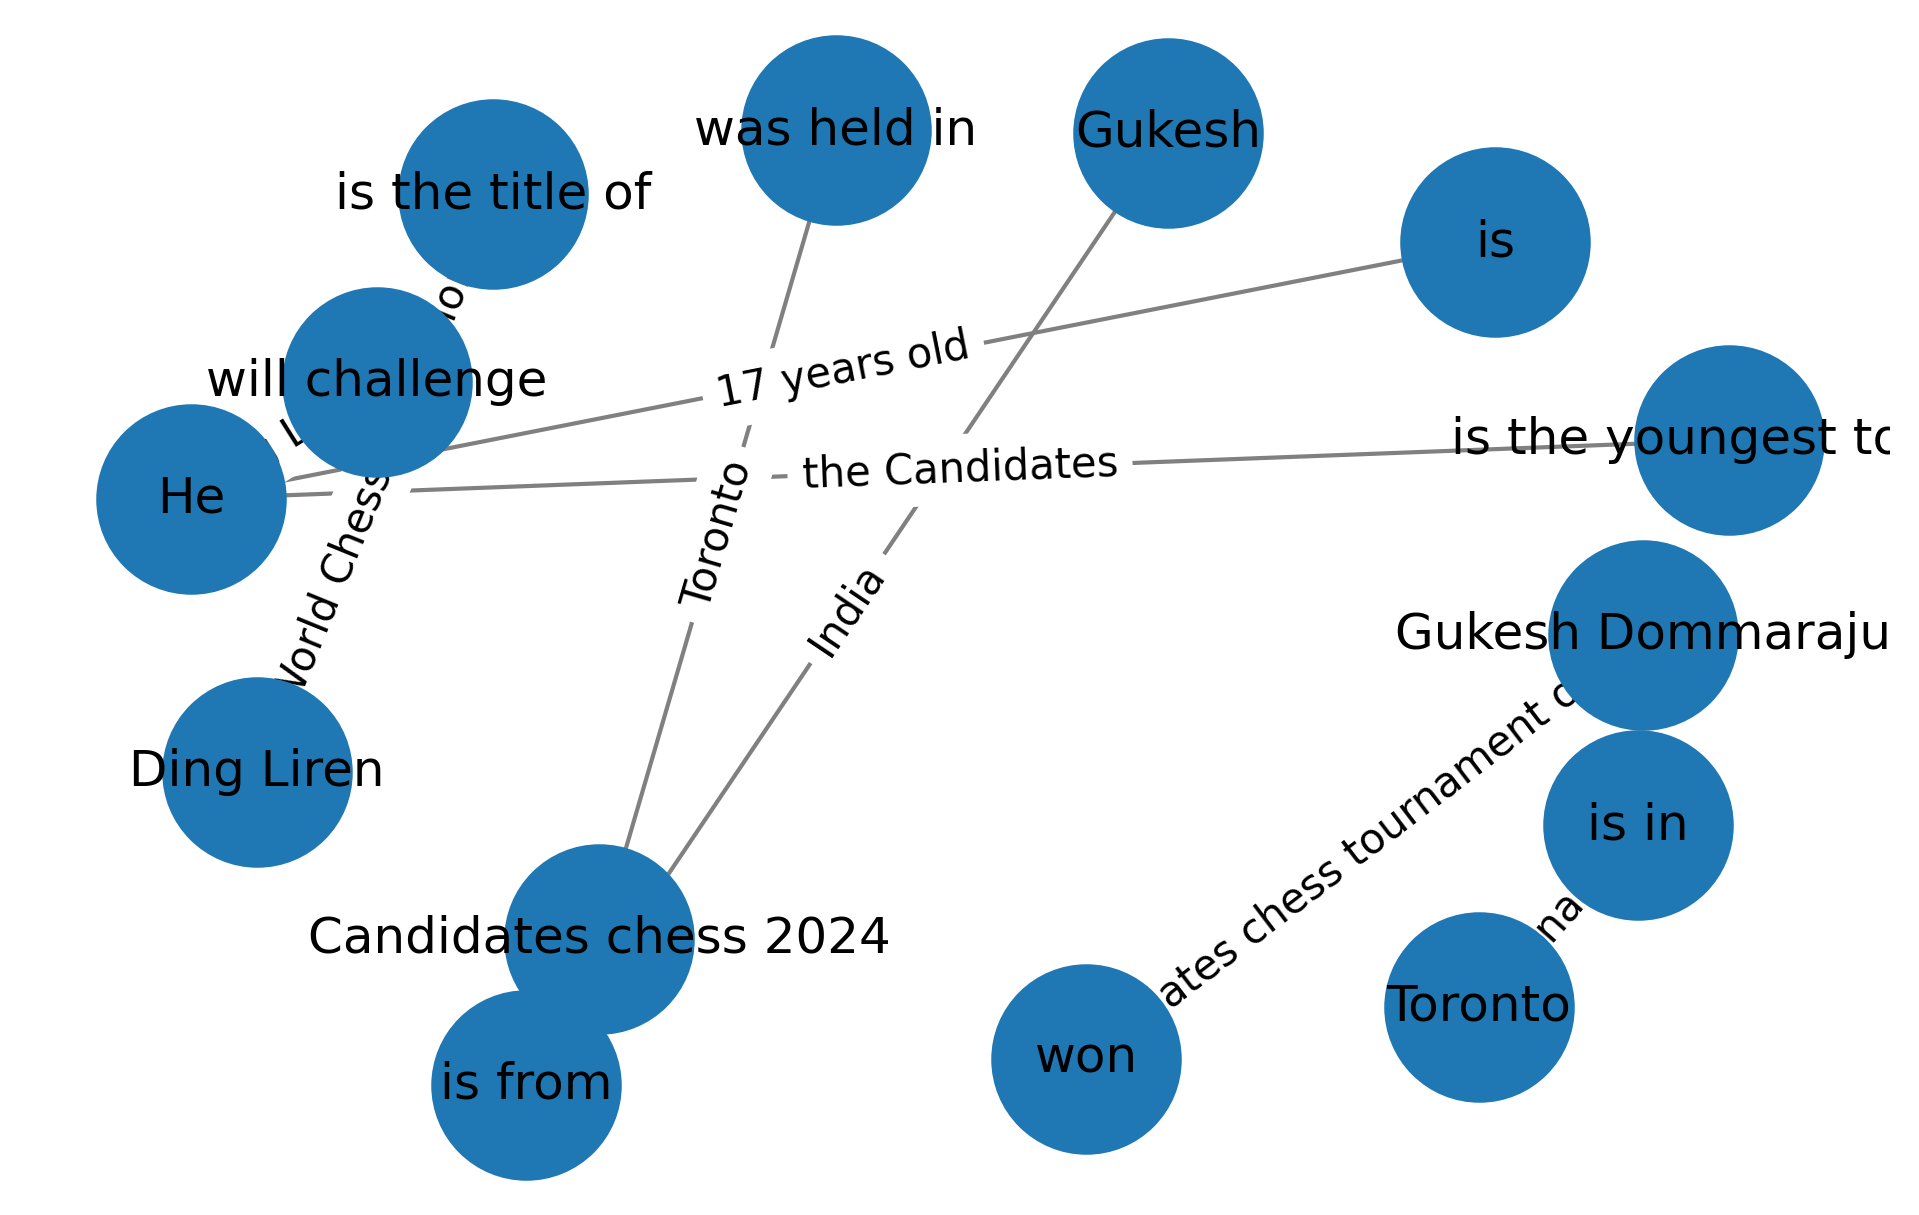

In [13]:
import matplotlib.pyplot as plt

# Create graph
G = nx.DiGraph()

for graph in graphs:
    G.add_edges_from((source, target, {'relation': relation}) for source, relation, target in graph.get_triples())

# Plot the graph
plt.figure(figsize=(8,5), dpi=300)
pos = nx.spring_layout(G, k=3, seed=0)

nx.draw_networkx_nodes(G, pos, node_size=2000)
nx.draw_networkx_edges(G, pos, edge_color='gray')
nx.draw_networkx_labels(G, pos, font_size=12)
edge_labels = nx.get_edge_attributes(G, 'relation')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=10)

# Display the plot
plt.axis('off')
plt.show()

In [33]:
print(f"The question I asked is - {question}")

chain = GraphQAChain.from_llm(llm=llm, graph=nx_graph, verbose=True, qa_llm=llm)

chain.run("Who won chess candidates 2024")

The question I asked is - Who won the Candidates 2024 chess tournament?


> Entering new GraphQAChain chain...
Entities Extracted:
 NONE
Full Context:


> Finished chain.


"\n\nI don't know."